In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
city_list_df = pd.read_csv("./city_list.csv")
city_list_df.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [6]:
city_data_df = pd.read_csv("./city_data.csv")
city_data_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [15]:
city_data_df['country'].unique()

array(["Côte D'Ivoire", 'United Arab Emirates', 'Nigeria', 'Ghana',
       'Turkey', 'Australia', 'India', 'United States', 'Egypt',
       'Algeria', 'Kazakhstan', 'Netherlands', 'China', 'Madagascar',
       'Eritrea', 'Greece', 'Iraq', 'Azerbaijan', 'Mali', 'Indonesia',
       'Thailand', 'Central African Republic', 'Spain', 'Venezuela',
       'Colombia', 'Lebanon', 'United Kingdom', 'Serbia', 'Brazil',
       'Libya', 'Germany', 'Switzerland', 'Guinea Bissau', 'Slovakia',
       'Congo', 'Belgium', 'Romania', 'Hungary', 'Burundi', 'Morocco',
       'Russia', 'Moldova', 'Sri Lanka', 'Guinea', 'Denmark', 'Argentina',
       'Senegal', 'Syria', 'Tanzania', 'Bangladesh', 'Qatar', 'Cameroon',
       'Ireland', 'South Africa', 'Tajikistan', 'Mexico', 'Pakistan',
       'Sierra Leone', 'Botswana', 'Guyana', 'Guatemala', 'Ecuador',
       'Vietnam', 'Zimbabwe', 'Finland', 'Japan', 'Sudan', 'Afghanistan',
       'Uganda', 'Taiwan', 'Nepal', 'Ukraine', 'Rwanda', 'Canada',
       'Jamaica', 

In [28]:
pd.unique(city_data_df[city_data_df['country']=='Iran']['city'])

array(['Mashhad', 'Shiraz', 'Tabriz'], dtype=object)

In [30]:
my_city = city_data_df[(city_data_df['country']=='Iran') &  (city_data_df['city']=='Shiraz')]
my_city.head()

,year,city,country,avg_temp
59879,1842,Shiraz,Iran,17.19
59880,1843,Shiraz,Iran,18.86
59881,1844,Shiraz,Iran,19.29
59882,1845,Shiraz,Iran,18.67
59883,1846,Shiraz,Iran,20.07


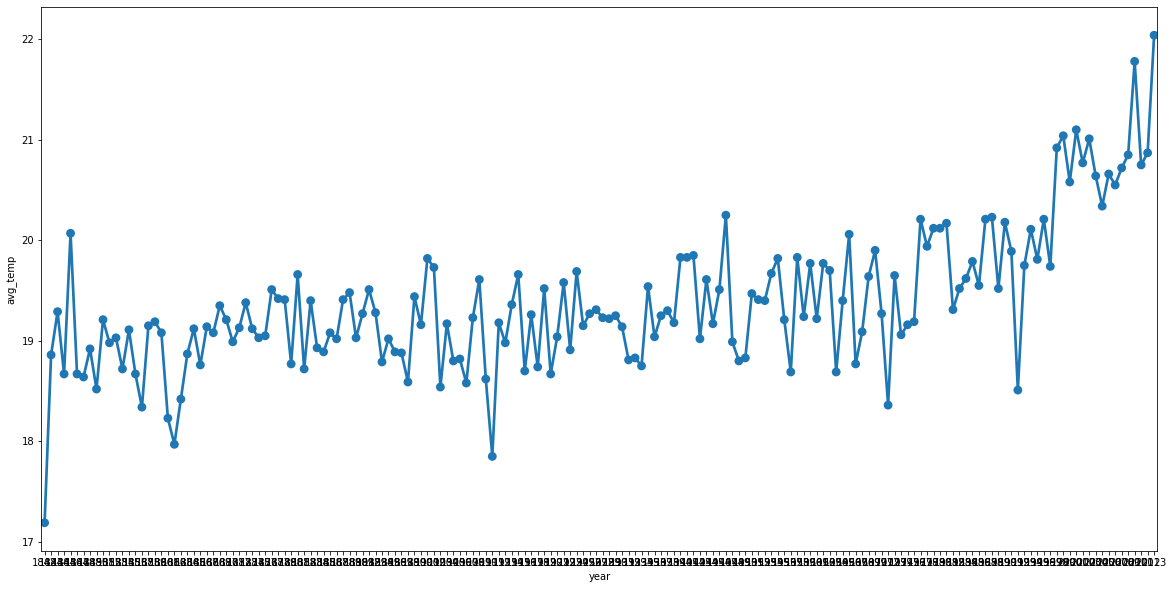

In [34]:
plt.figure(figsize=(20,10),)
sns.pointplot(x='year', y='avg_temp', data=my_city)

In [10]:
global_data_df = pd.read_csv("./global_data.csv")
global_data_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


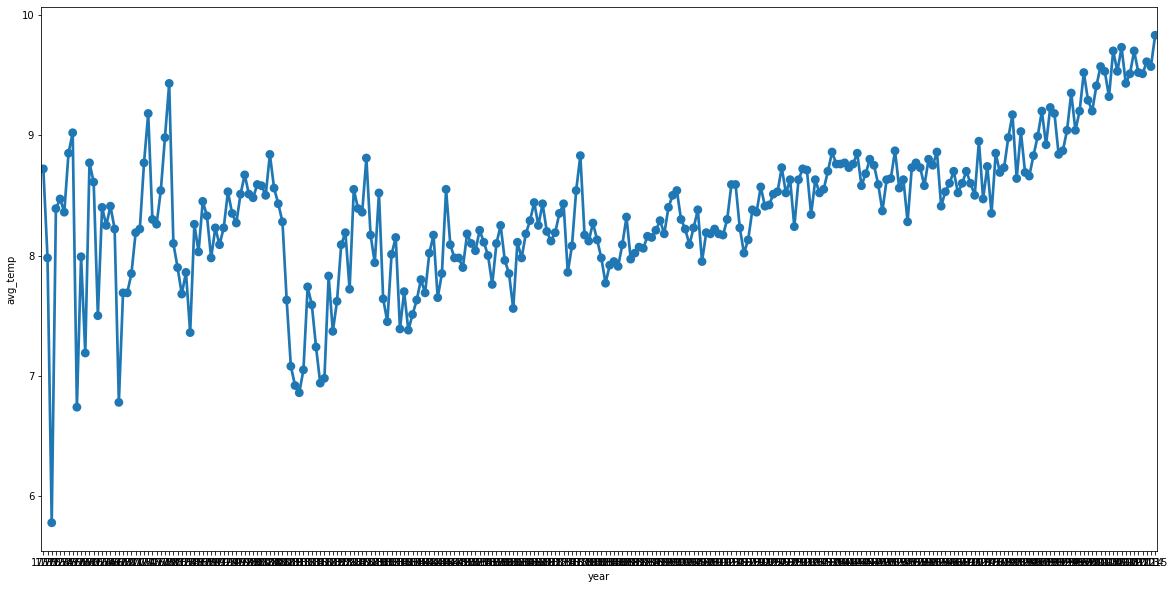

In [32]:
plt.figure(figsize=(20,10),)
sns.pointplot(x='year', y='avg_temp', data=global_data_df)

In [73]:
window_size = 10
mv_avg = my_city.avg_temp.rolling(window_size).mean()
mv_avg_list = mv_avg.to_list() # Masking is for removing NaNs
mv_avg_no_nan = mv_avg_list[window_size-1:]

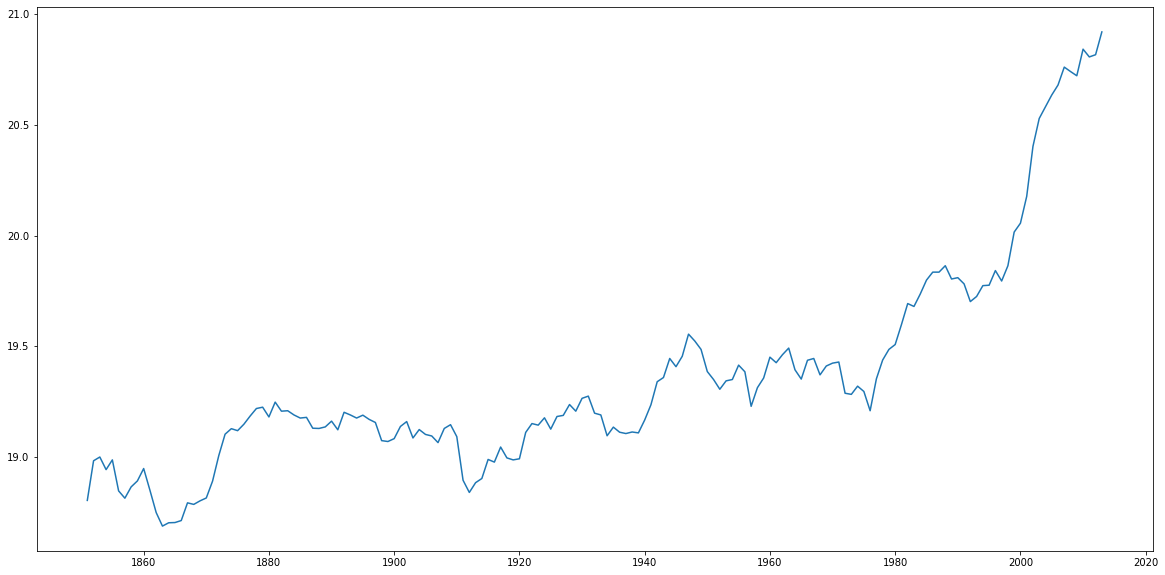

In [75]:
plt.figure(figsize=(20,10),)
plt.plot(my_city.year[window_size-1:], mv_avg_no_nan)

In [76]:
window_size = 10
gb_mv_avg = global_data_df.avg_temp.rolling(window_size).mean()
gb_mv_avg_list = gb_mv_avg.to_list() # Masking is for removing NaNs
gb_mv_avg_no_nan = gb_mv_avg_list[window_size-1:]

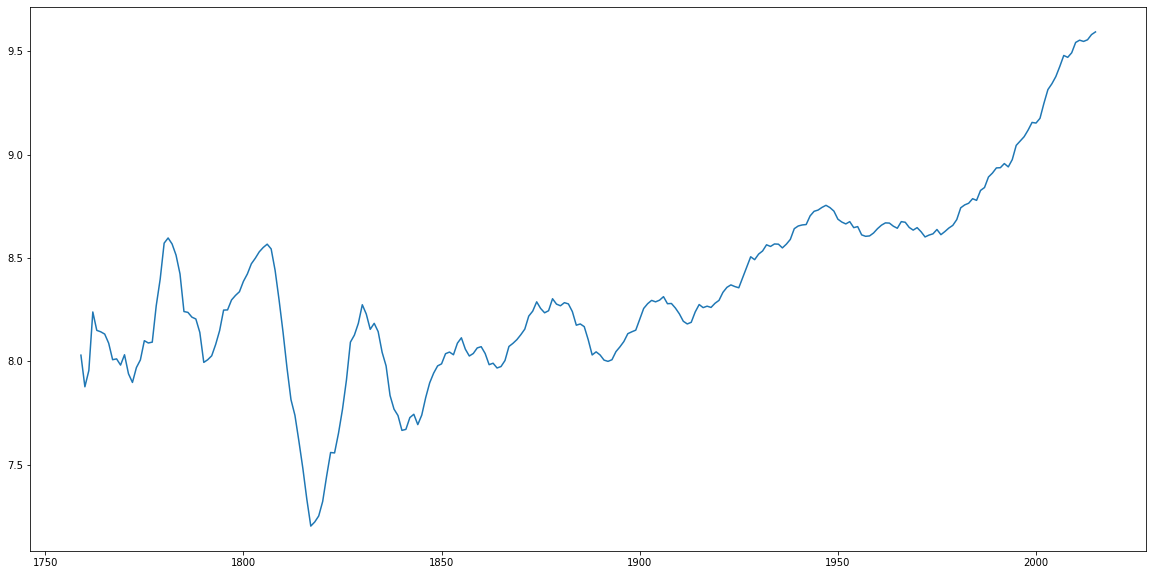

In [78]:
plt.figure(figsize=(20,10),)
plt.plot(global_data_df.year[window_size-1:], gb_mv_avg_no_nan)

In [85]:
merged_df = pd.merge(global_data_df, my_city, on='year')
merged_df.head()

,year,avg_temp_x,city,country,avg_temp_y
0,1842,8.02,Shiraz,Iran,17.19
1,1843,8.17,Shiraz,Iran,18.86
2,1844,7.65,Shiraz,Iran,19.29
3,1845,7.85,Shiraz,Iran,18.67
4,1846,8.55,Shiraz,Iran,20.07


In [89]:
window_size = 5
gb_mv_avg = merged_df.avg_temp_x.rolling(window_size).mean()
gb_mv_avg_list = gb_mv_avg.to_list() # Masking is for removing NaNs
gb_mv_avg_no_nan = gb_mv_avg_list[window_size-1:]

city_mv_avg = merged_df.avg_temp_y.rolling(window_size).mean()
city_mv_avg_list = city_mv_avg.to_list() # Masking is for removing NaNs
city_mv_avg_no_nan = city_mv_avg_list[window_size-1:]

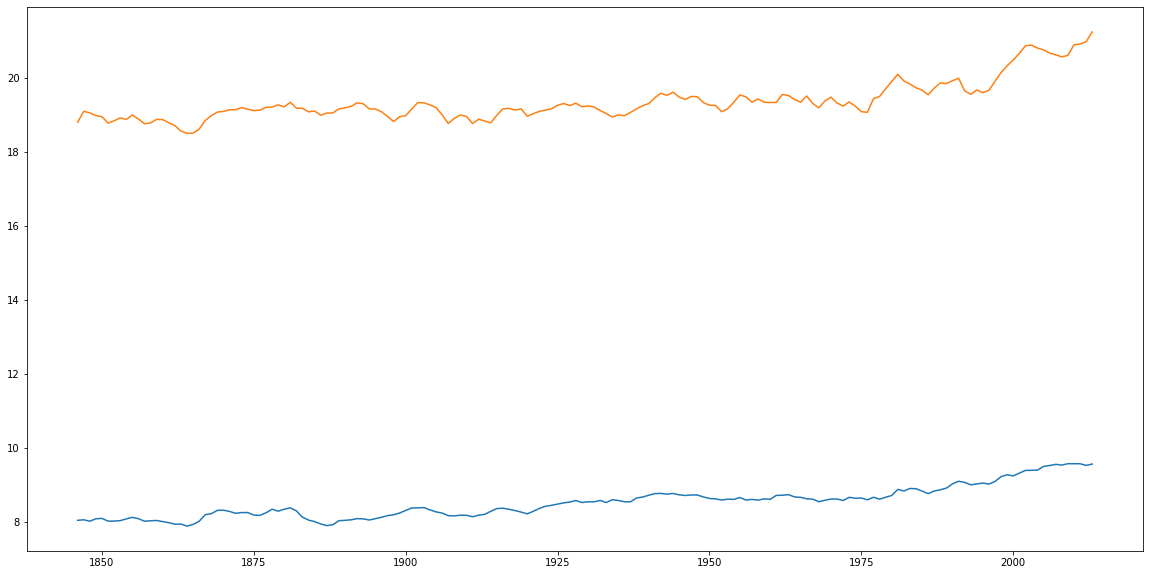

In [90]:
plt.figure(figsize=(20,10),)
plt.plot(merged_df.year[window_size-1:], gb_mv_avg_no_nan)
plt.plot(merged_df.year[window_size-1:], city_mv_avg_no_nan)